## Camera/ Distortion calibration

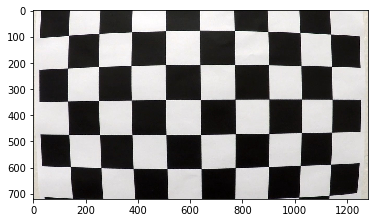

In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
%matplotlib inline

calib_img = mpimg.imread('./camera_cal/calibration1.jpg')
plt.imshow(calib_img)

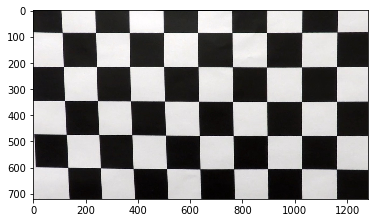

In [64]:
nx = 9
ny = 5
gray = cv2.cvtColor(calib_img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

if ret != True:
    raise ValueError("Number of corners doesn't matches.")

objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

objpoints = []
imgpoints = []

objpoints.append(objp)
imgpoints.append(corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, calib_img.shape[0:2], None, None)

#h,  w = img.shape[:2]
#newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
#undist = cv2.undistort(img, mtx, dist, None, newcameramtx)

calib_undist = cv2.undistort(calib_img, mtx, dist, None, mtx)

plt.imshow(calib_undist)

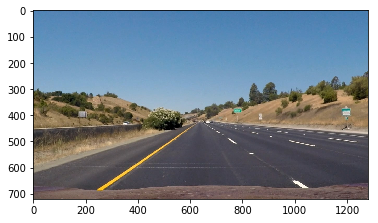

In [65]:
img = mpimg.imread('./test_images/straight_lines1.jpg')
plt.imshow(img)

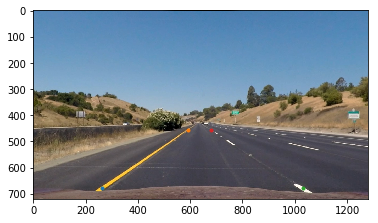

In [66]:
undist = cv2.undistort(img, mtx, dist, None, mtx)

plt.imshow(undist)

#mpimg.imsave('./output_images/undist_straight_lines1.jpg', undist)

src_bottom_left = [264.0, 680.0]
src_upper_left = [591.8, 457.8]
src_bottom_right = [1030.5, 680.0]
src_upper_right = [679.5, 457.8]
plt.plot(src_bottom_left[0], src_bottom_left[1], '.')
plt.plot(src_upper_left[0], src_upper_left[1], '.')
plt.plot(src_bottom_right[0], src_bottom_right[1], '.')
plt.plot(src_upper_right[0], src_upper_right[1], '.')

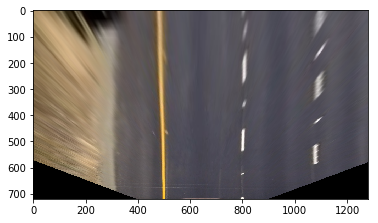

In [72]:
src = np.float32([
    src_bottom_left,
    src_upper_left,
    src_bottom_right,
    src_upper_right
])

dst_bottom_left = [500, 720]
dst_upper_left = [500,0]
dst_bottom_right = [800, 720]
dst_upper_right = [800, 0]
dst = np.float32([
    dst_bottom_left,
    dst_upper_left,
    dst_bottom_right,
    dst_upper_right
])

M = cv2.getPerspectiveTransform(src, dst)
img_size = (undist.shape[1], undist.shape[0])
warped = cv2.warpPerspective(undist, M, img_size)
plt.imshow(warped)